In [1]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
%pylab inline

import pickle as pkl
from itertools import islice
import datetime
import random
import itertools
import glob
import pickle as pkl
import time
import os


from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

rootPath = '../IMDA/'


Populating the interactive namespace from numpy and matplotlib


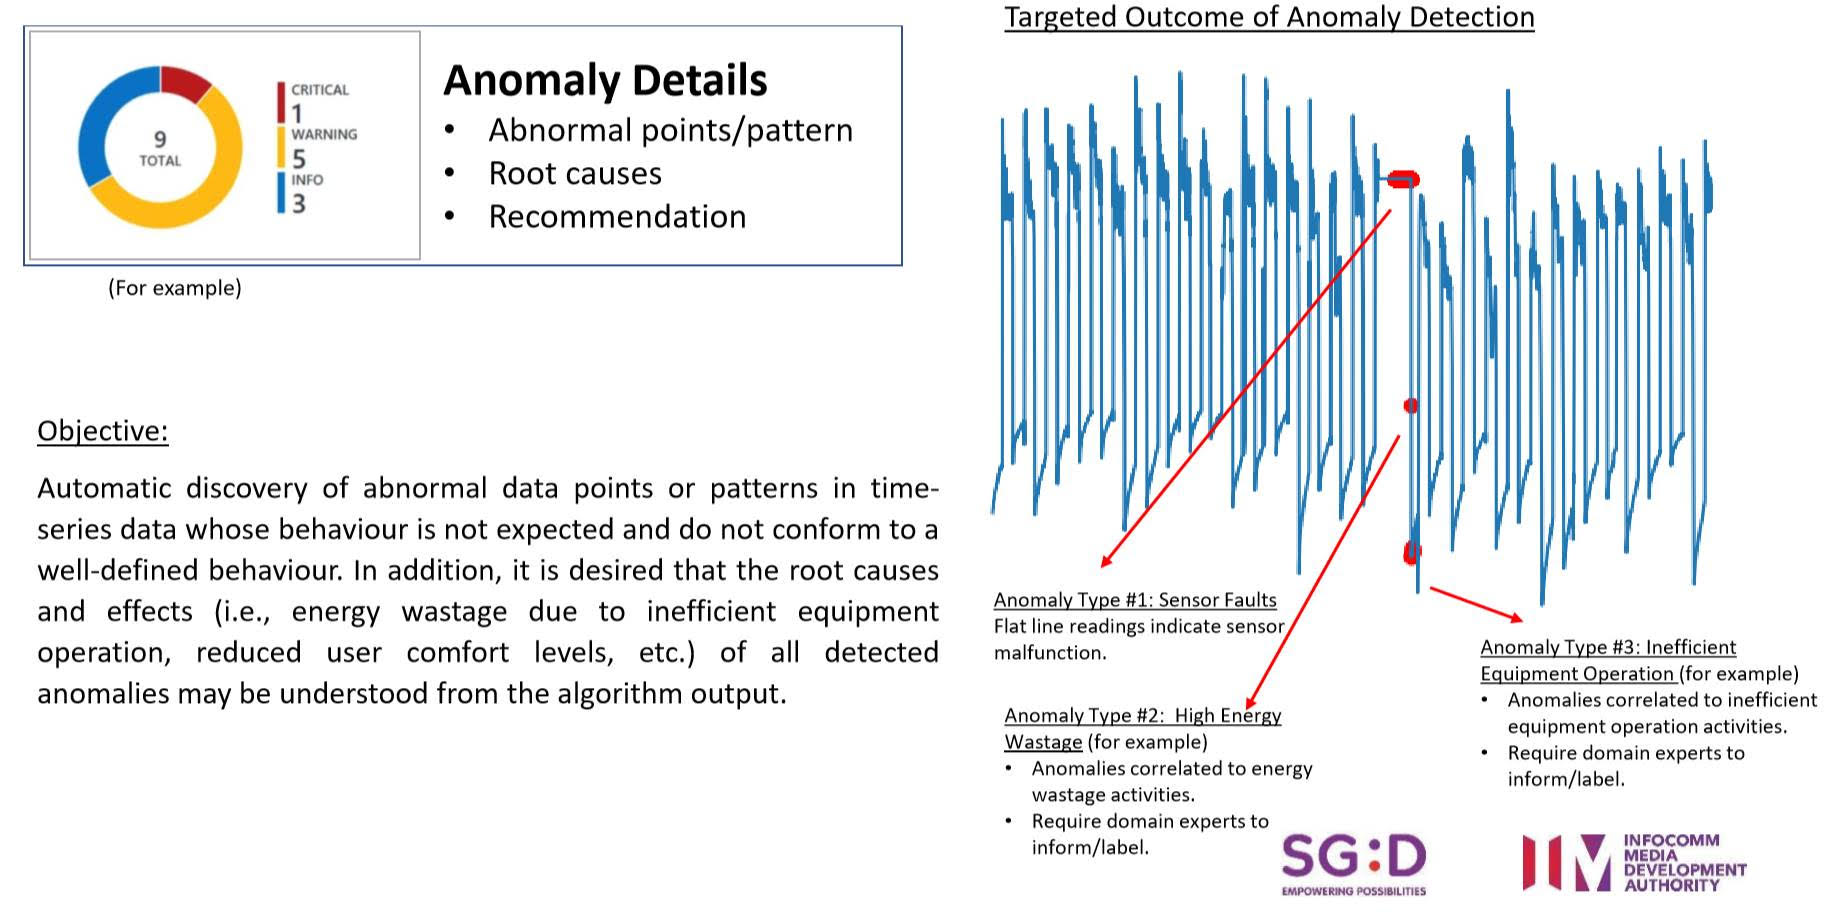

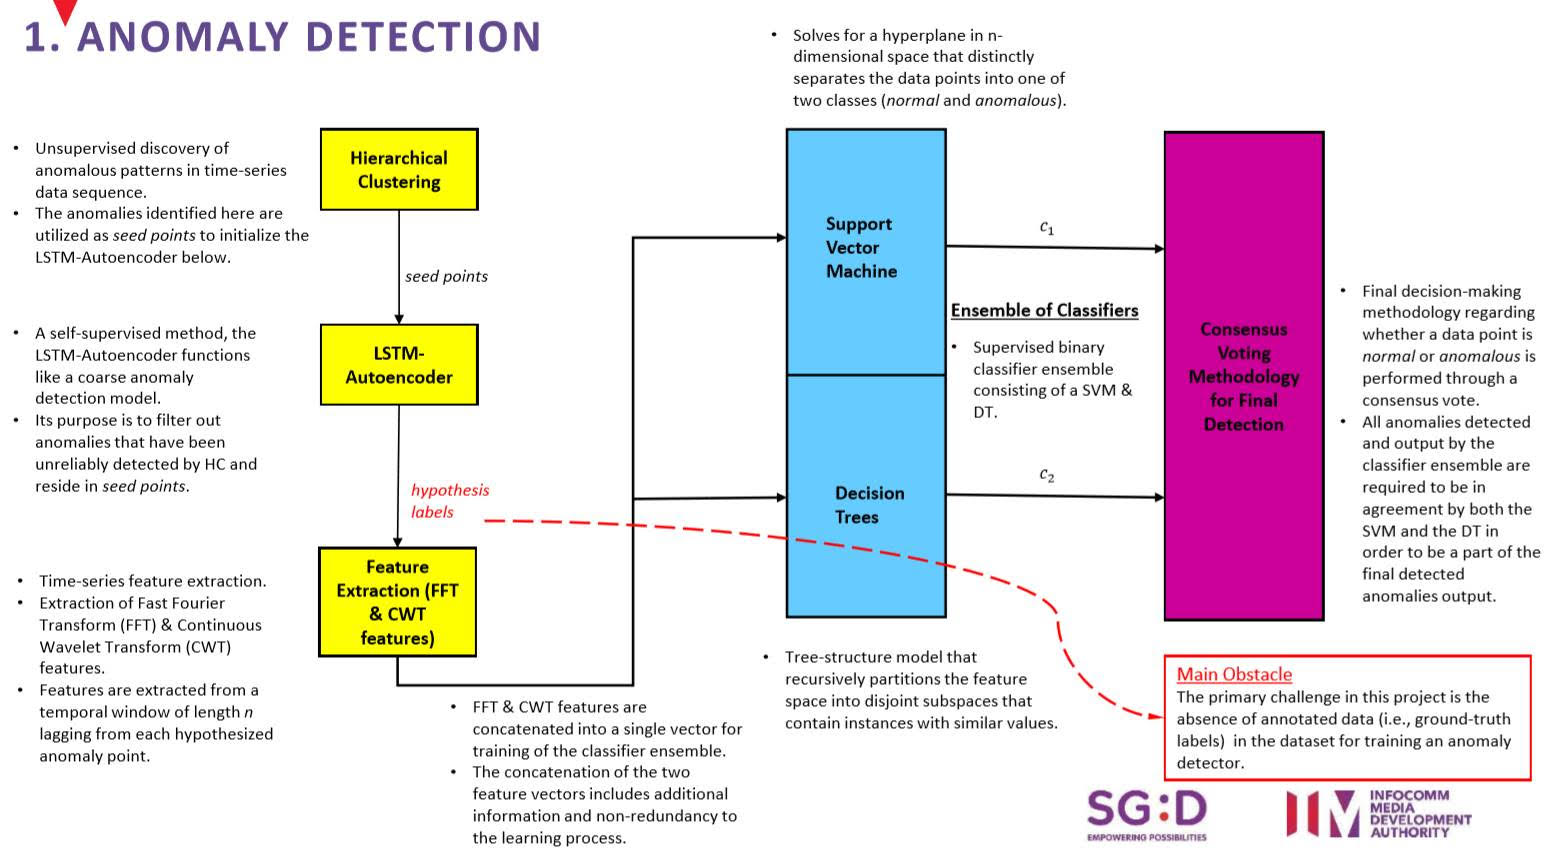

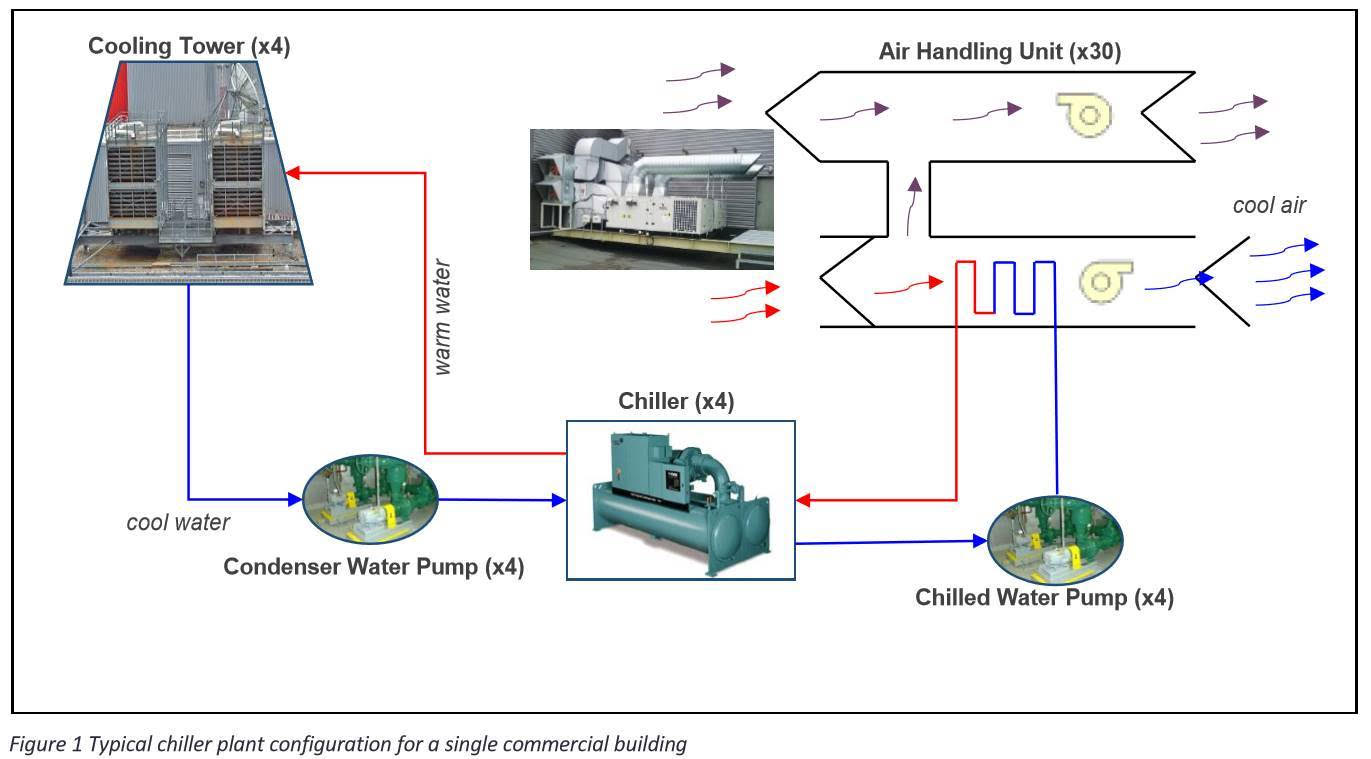
## Columns meaning:
 - CWRT: Condenser Water Return Temperature
 - HLI Entering CHW Temp: High Level Interface Entering (Return) Chilled Water Temperature

__*Anomaly Types*__ <br>
1. sensor fault
2. high energy wastage anomaly
3. inefficient equipment operation anomaly

## Read Data

In [2]:
maincols = ['CWRT_syth', 'HLI Entering CHW Temp']
derivecol = ['(CWRT_syth)-(HLI Entering CHW Temp)']
timecols=['weekday', 'hourminute']

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [21]:
data_3 = pd.read_csv(rootPath+'data_3.csv', index_col='timestamp', date_parser=dateparse)
display(data_3.head(2))
data_4 = pd.read_csv(rootPath+'data_4.csv', index_col='timestamp', date_parser=dateparse)
display(data_4.head(2))
data_5 = pd.read_csv(rootPath+'data_5.csv', index_col='timestamp', date_parser=dateparse)
display(data_5.head(2))

Date   Time  CWRT_syth  HLI Entering CHW Temp  \
timestamp                                                                  
2019-01-13 00:00:00  2019-01-13  0000h     31.090                    NaN   
2019-01-13 00:05:00  2019-01-13  0005h     31.106                    NaN   

                     LABEL_(CWRT_syth)_(wrong_gap)  \
timestamp                                            
2019-01-13 00:00:00                          False   
2019-01-13 00:05:00                          False   

                     LABEL_(HLI Entering CHW Temp)_(wrong_gap)  weekday  \
timestamp                                                                 
2019-01-13 00:00:00                                      False        7   
2019-01-13 00:05:00                                      False        7   

                     hourminute  Score_(CWRT_syth)_distanced  \
timestamp                                                      
2019-01-13 00:00:00           0                          0.0   
2019-01-13 00:05:00           5                          0.0   

                     Score_(HLI Entering CHW Temp)_distanced  \
timestamp                                                      
2019-01-13 00:00:00                                      NaN   
2019-01-13 00:05:00                                      NaN   

                     Score_(CWRT_syth)_cluster  \
timestamp                                        
2019-01-13 00:00:00                  27.467759   
2019-01-13 00:05:00                  27.467759   

                     Score_(HLI Entering CHW Temp)_cluster  \
timestamp                                                    
2019-01-13 00:00:00                                2.62796   
2019-01-13 00:05:00                                2.62796   

                     (CWRT_syth)-(HLI Entering CHW Temp)  \
timestamp                                                  
2019-01-13 00:00:00                                  NaN   
2019-01-13 00:05:00                                  NaN   

                     Score_(CWRT_syth)_timstamp_normalized(mean)  \
timestamp                                                          
2019-01-13 00:00:00                                      3.54368   
2019-01-13 00:05:00                                      2.79579   

                     Score_(CWRT_syth)_timstamp_normalized(median)  \
timestamp                                                            
2019-01-13 00:00:00                                       6.561008   
2019-01-13 00:05:00                                       6.304358   

                     Score_(CWRT_syth)_window_normalized(mae)  \
timestamp                                                       
2019-01-13 00:00:00                                  0.742736   
2019-01-13 00:05:00                                  1.586232   

                     Score_(CWRT_syth)_window_normalized(mse)  \
timestamp                                                       
2019-01-13 00:00:00                                  0.004811   
2019-01-13 00:05:00                                  0.012706   

                     Score_(CWRT_syth)_window_normalized(rmse)  
timestamp                                                       
2019-01-13 00:00:00                                   0.395876  
2019-01-13 00:05:00                                   0.790690

Date   Time  CWRT_syth  HLI Entering CHW Temp  \
timestamp                                                                  
2019-01-13 00:00:00  2019-01-13  0000h     31.090                    NaN   
2019-01-13 00:05:00  2019-01-13  0005h     31.106                    NaN   

                     LABEL_(CWRT_syth)_(wrong_gap)  \
timestamp                                            
2019-01-13 00:00:00                          False   
2019-01-13 00:05:00                          False   

                     LABEL_(HLI Entering CHW Temp)_(wrong_gap)  weekday  \
timestamp                                                                 
2019-01-13 00:00:00                                      False        7   
2019-01-13 00:05:00                                      False        7   

                     hourminute  Score_(CWRT_syth)_distanced  \
timestamp                                                      
2019-01-13 00:00:00           0                          0.0   
2019-01-13 00:05:00           5                          0.0   

                     Score_(HLI Entering CHW Temp)_distanced  \
timestamp                                                      
2019-01-13 00:00:00                                      NaN   
2019-01-13 00:05:00                                      NaN   

                     Score_(CWRT_syth)_cluster  \
timestamp                                        
2019-01-13 00:00:00                  27.467759   
2019-01-13 00:05:00                  27.467759   

                     Score_(HLI Entering CHW Temp)_cluster  \
timestamp                                                    
2019-01-13 00:00:00                                2.62796   
2019-01-13 00:05:00                                2.62796   

                     (CWRT_syth)-(HLI Entering CHW Temp)  \
timestamp                                                  
2019-01-13 00:00:00                                  NaN   
2019-01-13 00:05:00                                  NaN   

                     Score_(HLI Entering CHW Temp)_timstamp_normalized(mean)  \
timestamp                                                                      
2019-01-13 00:00:00                                                NaN         
2019-01-13 00:05:00                                                NaN         

                     Score_(HLI Entering CHW Temp)_timstamp_normalized(median)  \
timestamp                                                                        
2019-01-13 00:00:00                                                NaN           
2019-01-13 00:05:00                                                NaN           

                     Score_(HLI Entering CHW Temp)_window_normalized(mae)  \
timestamp                                                                   
2019-01-13 00:00:00                                                NaN      
2019-01-13 00:05:00                                                NaN      

                     Score_(HLI Entering CHW Temp)_window_normalized(mse)  \
timestamp                                                                   
2019-01-13 00:00:00                                                NaN      
2019-01-13 00:05:00                                                NaN      

                     Score_(HLI Entering CHW Temp)_window_normalized(rmse)  
timestamp                                                                   
2019-01-13 00:00:00                                                NaN      
2019-01-13 00:05:00                                                NaN

Date   Time  CWRT_syth  HLI Entering CHW Temp  \
timestamp                                                                  
2019-01-13 00:00:00  2019-01-13  0000h     31.090                    NaN   
2019-01-13 00:05:00  2019-01-13  0005h     31.106                    NaN   

                     LABEL_(CWRT_syth)_(wrong_gap)  \
timestamp                                            
2019-01-13 00:00:00                          False   
2019-01-13 00:05:00                          False   

                     LABEL_(HLI Entering CHW Temp)_(wrong_gap)  weekday  \
timestamp                                                                 
2019-01-13 00:00:00                                      False        7   
2019-01-13 00:05:00                                      False        7   

                     hourminute  Score_(CWRT_syth)_distanced  \
timestamp                                                      
2019-01-13 00:00:00           0                          0.0   
2019-01-13 00:05:00           5                          0.0   

                     Score_(HLI Entering CHW Temp)_distanced  \
timestamp                                                      
2019-01-13 00:00:00                                      NaN   
2019-01-13 00:05:00                                      NaN   

                     Score_(CWRT_syth)_cluster  \
timestamp                                        
2019-01-13 00:00:00                  27.467759   
2019-01-13 00:05:00                  27.467759   

                     Score_(HLI Entering CHW Temp)_cluster  \
timestamp                                                    
2019-01-13 00:00:00                                2.62796   
2019-01-13 00:05:00                                2.62796   

                     (CWRT_syth)-(HLI Entering CHW Temp)  \
timestamp                                                  
2019-01-13 00:00:00                                  NaN   
2019-01-13 00:05:00                                  NaN   

                     Score_((CWRT_syth)-(HLI Entering CHW Temp))_timstamp_normalized(mean)  \
timestamp                                                                                    
2019-01-13 00:00:00                                                NaN                       
2019-01-13 00:05:00                                                NaN                       

                     Score_((CWRT_syth)-(HLI Entering CHW Temp))_timstamp_normalized(median)  \
timestamp                                                                                      
2019-01-13 00:00:00                                                NaN                         
2019-01-13 00:05:00                                                NaN                         

                     Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(mae)  \
timestamp                                                                                 
2019-01-13 00:00:00                                                NaN                    
2019-01-13 00:05:00                                                NaN                    

                     Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(mse)  \
timestamp                                                                                 
2019-01-13 00:00:00                                                NaN                    
2019-01-13 00:05:00                                                NaN                    

                     Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(rmse)  
timestamp                                                                                 
2019-01-13 00:00:00                                                NaN                    
2019-01-13 00:05:00                                                NaN

In [22]:
data_combine = pd.concat(
    [data_3, 
     data_4[['Score_(HLI Entering CHW Temp)_timstamp_normalized(mean)', 
             'Score_(HLI Entering CHW Temp)_timstamp_normalized(median)',
             'Score_(HLI Entering CHW Temp)_window_normalized(mae)',
             'Score_(HLI Entering CHW Temp)_window_normalized(mse)',
             'Score_(HLI Entering CHW Temp)_window_normalized(rmse)']], 
     data_5[['Score_((CWRT_syth)-(HLI Entering CHW Temp))_timstamp_normalized(mean)', 
             'Score_((CWRT_syth)-(HLI Entering CHW Temp))_timstamp_normalized(median)',
             'Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(mae)',
             'Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(mse)',
             'Score_((CWRT_syth)-(HLI Entering CHW Temp))_window_normalized(rmse)']]], axis=1)

del data_3
del data_4
del data_5

print(data_combine.shape)
print(data_combine.dtypes)
print(min(data_combine.index), max(data_combine.index))
display(data_combine.head())


(17719, 28)
Date                                                                        object
Time                                                                        object
CWRT_syth                                                                  float64
HLI Entering CHW Temp                                                      float64
LABEL_(CWRT_syth)_(wrong_gap)                                                 bool
LABEL_(HLI Entering CHW Temp)_(wrong_gap)                                     bool
weekday                                                                      int64
hourminute                                                                   int64
Score_(CWRT_syth)_distanced                                                float64
Score_(HLI Entering CHW Temp)_distanced                                    float64
Score_(CWRT_syth)_cluster                                                  float64
Score_(HLI Entering CHW Temp)_cluster                                      

Date   Time  CWRT_syth  HLI Entering CHW Temp  \
timestamp                                                                  
2019-01-13 00:00:00  2019-01-13  0000h  31.090000                    NaN   
2019-01-13 00:05:00  2019-01-13  0005h  31.106000                    NaN   
2019-01-13 00:10:00  2019-01-13  0010h  31.129999                   10.6   
2019-01-13 00:15:00  2019-01-13  0015h  31.146000                    NaN   
2019-01-13 00:20:00  2019-01-13  0020h  31.170000                    NaN   

                     LABEL_(CWRT_syth)_(wrong_gap)  \
timestamp                                            
2019-01-13 00:00:00                          False   
2019-01-13 00:05:00                          False   
2019-01-13 00:10:00                          False   
2019-01-13 00:15:00                          False   
2019-01-13 00:20:00                          False   

                     LABEL_(HLI Entering CHW Temp)_(wrong_gap)  weekday  \
timestamp                                                                 
2019-01-13 00:00:00                                      False        7   
2019-01-13 00:05:00                                      False        7   
2019-01-13 00:10:00                                      False        7   
2019-01-13 00:15:00                                      False        7   
2019-01-13 00:20:00                                      False        7   

                     hourminute  Score_(CWRT_syth)_distanced  \
timestamp                                                      
2019-01-13 00:00:00           0                          0.0   
2019-01-13 00:05:00           5                          0.0   
2019-01-13 00:10:00          10                          0.0   
2019-01-13 00:15:00          15                          0.0   
2019-01-13 00:20:00          20                          0.0   

                     Score_(HLI Entering CHW Temp)_distanced  \
timestamp                                                      
2019-01-13 00:00:00                                      NaN   
2019-01-13 00:05:00                                      NaN   
2019-01-13 00:10:00                                      0.0   
2019-01-13 00:15:00                                      NaN   
2019-01-13 00:20:00                                      NaN   

                     Score_(CWRT_syth)_cluster  \
timestamp                                        
2019-01-13 00:00:00                  27.467759   
2019-01-13 00:05:00                  27.467759   
2019-01-13 00:10:00                  27.467759   
2019-01-13 00:15:00                  27.467759   
2019-01-13 00:20:00                  27.467759   

                     Score_(HLI Entering CHW Temp)_cluster  \
timestamp                                                    
2019-01-13 00:00:00                                2.62796   
2019-01-13 00:05:00                                2.62796   
2019-01-13 00:10:00                                2.62796   
2019-01-13 00:15:00                                2.62796   
2019-01-13 00:20:00                                2.62796   

                     (CWRT_syth)-(HLI Entering CHW Temp)  \
timestamp                                                  
2019-01-13 00:00:00                                  NaN   
2019-01-13 00:05:00                                  NaN   
2019-01-13 00:10:00                            20.529999   
2019-01-13 00:15:00                                  NaN   
2019-01-13 00:20:00                                  NaN   

                     Score_(CWRT_syth)_timstamp_normalized(mean)  \
timestamp                                                          
2019-01-13 00:00:00                                     3.543680   
2019-01-13 00:05:00                                     2.795790   
2019-01-13 00:10:00                                     2.004219   
2019-01-13 00:15:00                                     1.135051   
2019-01-13 00:20:00                                     0.203464   

       

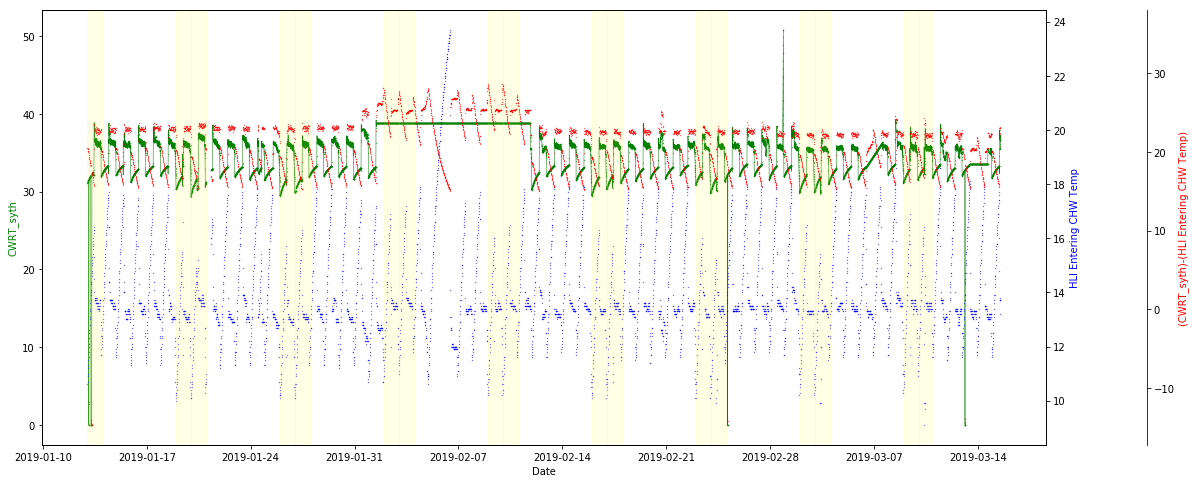

In [23]:
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))

for c, ax_, clr in zip(maincols+derivecol, [ax1, ax2, ax3], ['g', 'b', 'r']):
    ax_.plot_date(data_combine.index, data_combine[c], c=clr[0], 
                  markersize=0.5, marker='.', linewidth=0.5, linestyle='-')
    ax_.set_ylabel(c, color=clr)
    ax_.set_xlabel('Date')

tmp = data_combine.index.to_frame()
tmp['wkday'] = data_combine.index.weekday+1
tmp['date'] = tmp.index.date
allwknddate = np.unique(tmp.loc[tmp['wkday'].isin([6,7]), 'date'])
for dt in allwknddate:
    alltm_dt = tmp[str(dt)].index
    plt.axvspan(min(alltm_dt), max(alltm_dt), alpha=0.1, color='yellow')

plt.show()


In [24]:
pctoutlier_dict = {'CWRT_syth': 0.2, 
                   'HLI Entering CHW Temp': 0.02, 
                   '(CWRT_syth)-(HLI Entering CHW Temp)': 0.003}

thrshold_dict = {}
for col in maincols+derivecol:
    ts_score_cols = ['Score_('+col+')_timstamp_normalized('+m+')' for m in ['mean', 'median']]
    wd_score_cols = ['Score_('+col+')_window_normalized('+m+')' for m in ['mae', 'rmse']]
    data_combine['('+col+')_outlier score_(timstamp)'] = data_combine[ts_score_cols].mean(axis=1)
    data_combine['('+col+')_outlier score_(window)'] = data_combine[wd_score_cols].mean(axis=1)
    thrshold_dict['('+col+')_timstamp'] = np.nanpercentile(
        data_combine['('+col+')_outlier score_(timstamp)'].values, (1-pctoutlier_dict[col])*100) 
    thrshold_dict['('+col+')_window'] = np.nanpercentile(
        data_combine['('+col+')_outlier score_(window)'].values, (1-pctoutlier_dict[col])*100)     
    
print(thrshold_dict) 
display(data_combine.head())

{'(CWRT_syth)_timstamp': 5.769837780722785, '(CWRT_syth)_window': 0.7199279527840654, '(HLI Entering CHW Temp)_timstamp': 22.207417952591555, '(HLI Entering CHW Temp)_window': 34.68395714030771, '((CWRT_syth)-(HLI Entering CHW Temp))_timstamp': 34.309481306380135, '((CWRT_syth)-(HLI Entering CHW Temp))_window': 37.2984369543798}


Date   Time  CWRT_syth  HLI Entering CHW Temp  \
timestamp                                                                  
2019-01-13 00:00:00  2019-01-13  0000h  31.090000                    NaN   
2019-01-13 00:05:00  2019-01-13  0005h  31.106000                    NaN   
2019-01-13 00:10:00  2019-01-13  0010h  31.129999                   10.6   
2019-01-13 00:15:00  2019-01-13  0015h  31.146000                    NaN   
2019-01-13 00:20:00  2019-01-13  0020h  31.170000                    NaN   

                     LABEL_(CWRT_syth)_(wrong_gap)  \
timestamp                                            
2019-01-13 00:00:00                          False   
2019-01-13 00:05:00                          False   
2019-01-13 00:10:00                          False   
2019-01-13 00:15:00                          False   
2019-01-13 00:20:00                          False   

                     LABEL_(HLI Entering CHW Temp)_(wrong_gap)  weekday  \
timestamp                                                                 
2019-01-13 00:00:00                                      False        7   
2019-01-13 00:05:00                                      False        7   
2019-01-13 00:10:00                                      False        7   
2019-01-13 00:15:00                                      False        7   
2019-01-13 00:20:00                                      False        7   

                     hourminute  Score_(CWRT_syth)_distanced  \
timestamp                                                      
2019-01-13 00:00:00           0                          0.0   
2019-01-13 00:05:00           5                          0.0   
2019-01-13 00:10:00          10                          0.0   
2019-01-13 00:15:00          15                          0.0   
2019-01-13 00:20:00          20                          0.0   

                     Score_(HLI Entering CHW Temp)_distanced  \
timestamp                                                      
2019-01-13 00:00:00                                      NaN   
2019-01-13 00:05:00                                      NaN   
2019-01-13 00:10:00                                      0.0   
2019-01-13 00:15:00                                      NaN   
2019-01-13 00:20:00                                      NaN   

                     Score_(CWRT_syth)_cluster  \
timestamp                                        
2019-01-13 00:00:00                  27.467759   
2019-01-13 00:05:00                  27.467759   
2019-01-13 00:10:00                  27.467759   
2019-01-13 00:15:00                  27.467759   
2019-01-13 00:20:00                  27.467759   

                     Score_(HLI Entering CHW Temp)_cluster  \
timestamp                                                    
2019-01-13 00:00:00                                2.62796   
2019-01-13 00:05:00                                2.62796   
2019-01-13 00:10:00                                2.62796   
2019-01-13 00:15:00                                2.62796   
2019-01-13 00:20:00                                2.62796   

                     (CWRT_syth)-(HLI Entering CHW Temp)  \
timestamp                                                  
2019-01-13 00:00:00                                  NaN   
2019-01-13 00:05:00                                  NaN   
2019-01-13 00:10:00                            20.529999   
2019-01-13 00:15:00                                  NaN   
2019-01-13 00:20:00                                  NaN   

                     Score_(CWRT_syth)_timstamp_normalized(mean)  \
timestamp                                                          
2019-01-13 00:00:00                                     3.543680   
2019-01-13 00:05:00                                     2.795790   
2019-01-13 00:10:00                                     2.004219   
2019-01-13 00:15:00                                     1.135051   
2019-01-13 00:20:00                                     0.203464   

       

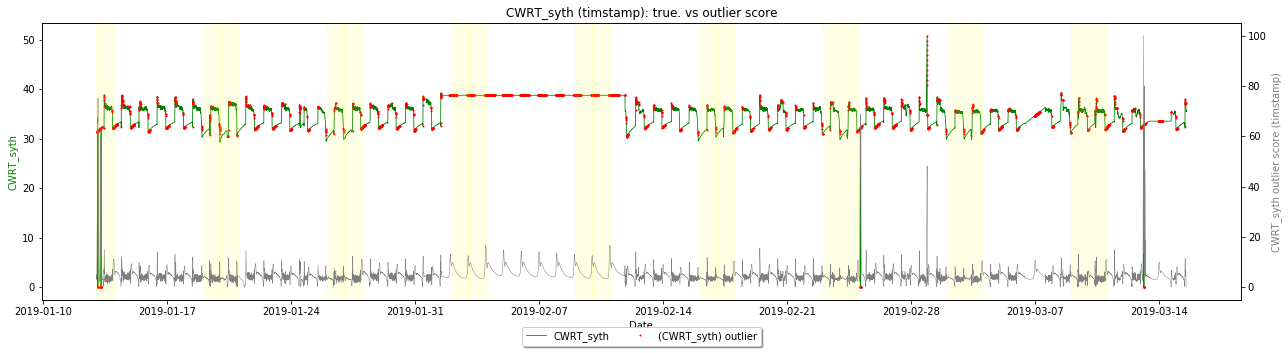

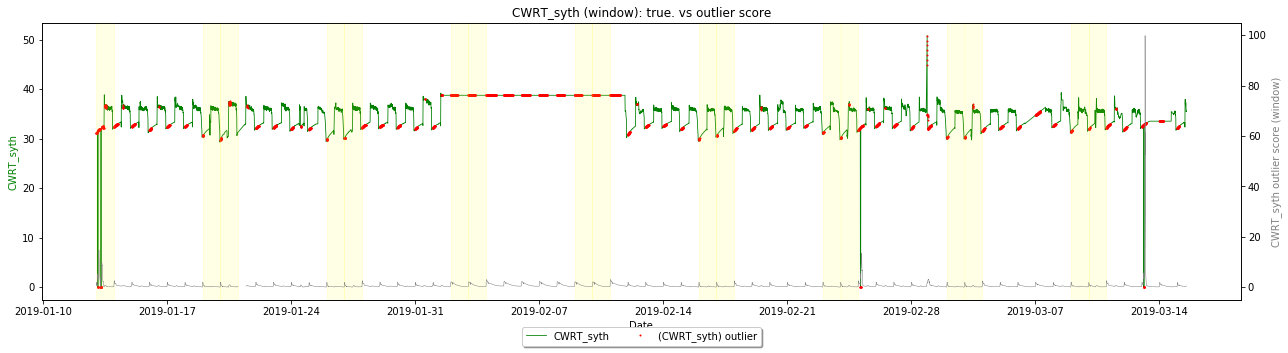

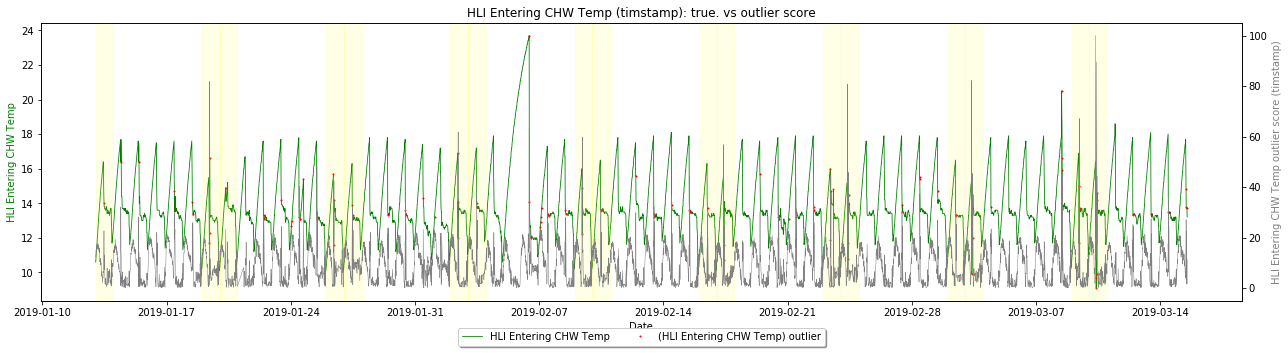

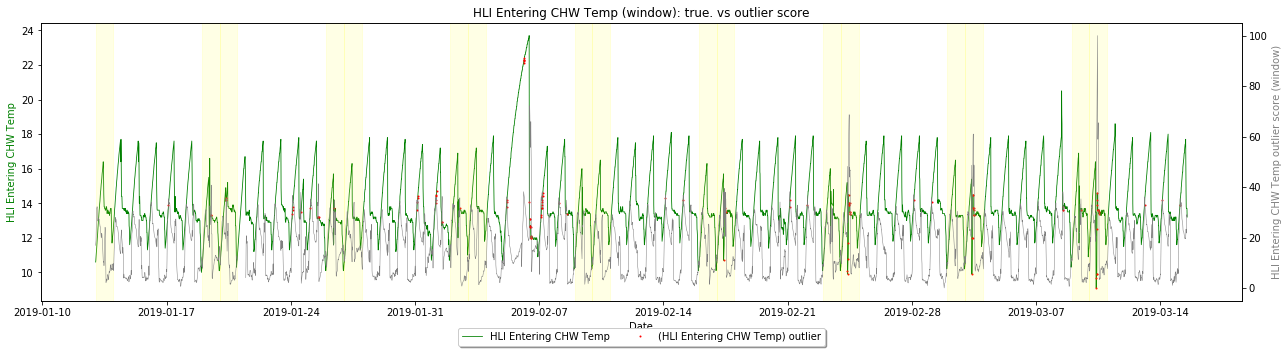

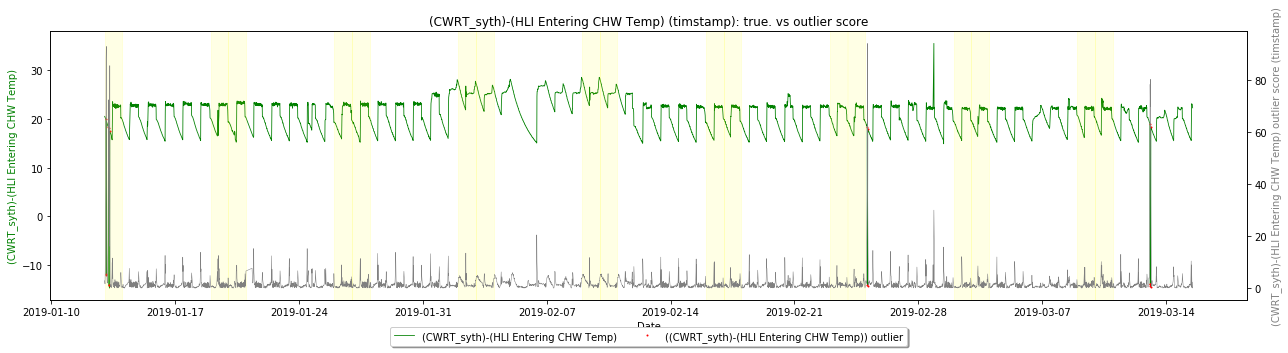

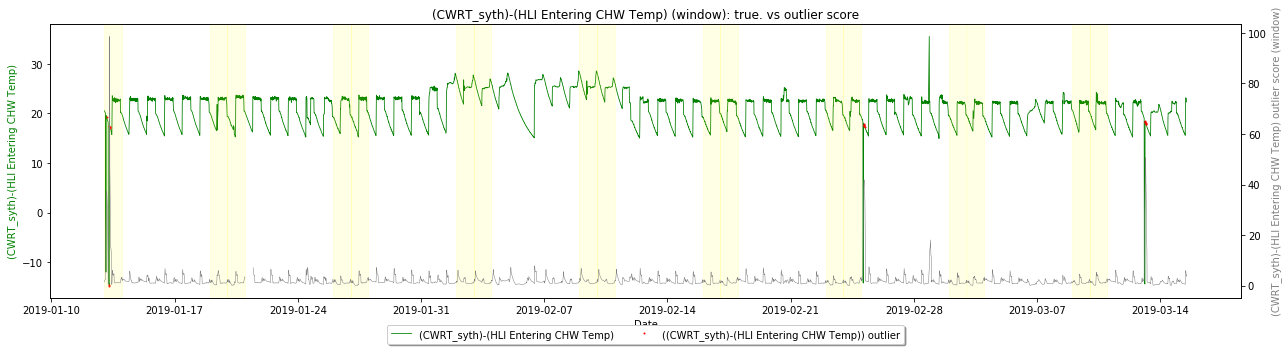

In [27]:
# ------------ outlier score plot ------------------

for col in maincols+derivecol:
    for tp in ['timstamp', 'window']:
        thrshold = thrshold_dict['('+col+')_'+tp]
        df = data_combine.copy().dropna(subset=[col])
        subdf_outlier = df[df['('+col+')_outlier score_('+tp+')']>thrshold].copy().dropna(subset=[col])

        fig, ax1 = plt.subplots(figsize=(18, 5))
        ax2 = ax1.twinx()
        ax2.spines['right'].set_position(('axes', 1))

        L1 = ax1.plot_date(df.index, df[col],
                           c='green',  markersize=0.5,  marker='', linewidth=0.8, linestyle='-', 
                           label=col)
        L2 = ax1.plot_date(subdf_outlier.index, subdf_outlier[col], 
                           c='red',  markersize=2,  marker='.', linewidth=0.2, linestyle='', 
                           label='('+col+') outlier')
        ax1.set_ylabel(col, color='green')
        ax1.set_xlabel('Date')

        tmp = data_combine.index.to_frame()
        tmp['wkday'] = data_combine.index.weekday+1
        tmp['date'] = tmp.index.date
        allwknddate = np.unique(tmp.loc[tmp['wkday'].isin([6,7]), 'date'])
        i = 0
        for dt in allwknddate:
            alltm_dt = tmp[str(dt)].index
            if i == len(allwknddate)-1:
                plt.axvspan(min(alltm_dt), max(alltm_dt), alpha=0.1, color='yellow', label='weekends')
            else:
                plt.axvspan(min(alltm_dt), max(alltm_dt), alpha=0.1, color='yellow')
            i += 1

        L3 = ax2.plot_date(df.index, df['('+col+')_outlier score_('+tp+')'], 
                      c='grey',  markersize=1,  marker='', 
                      linewidth=0.5, linestyle='-', label='('+col+') outlier score ('+tp+')')
        ax2.set_ylabel(col+' outlier score ('+tp+')', color='grey')

        plt.title(col+' ('+tp+'): true. vs outlier score')
        lns = L1+L2+L3
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, shadow=True, ncol=5)
        plt.tight_layout()
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, shadow=True, ncol=5)
        plt.show()


## Modify score

In [29]:
def getnextscore(df_, scorecol, windowsize, pctoutlier = 0.1):
    df = df_.copy()
    thrshold = np.nanpercentile(df[scorecol].values, (1-pctoutlier)*100)
    df['modified_score'] = df_[scorecol]
    df.loc[df[scorecol]>thrshold, 'modified_score'] = np.nan
    df['modified_score'] = df['modified_score'].rolling(window=windowsize).mean()
    cond = (df['modified_score'].isna())|(df[scorecol]>thrshold)
    df.loc[cond, 'modified_score'] = df.loc[cond, scorecol]
    return df['modified_score']


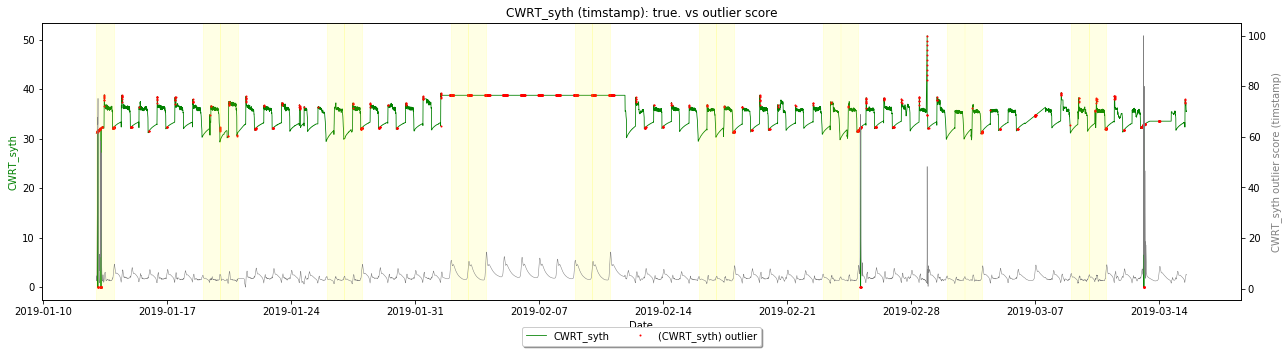

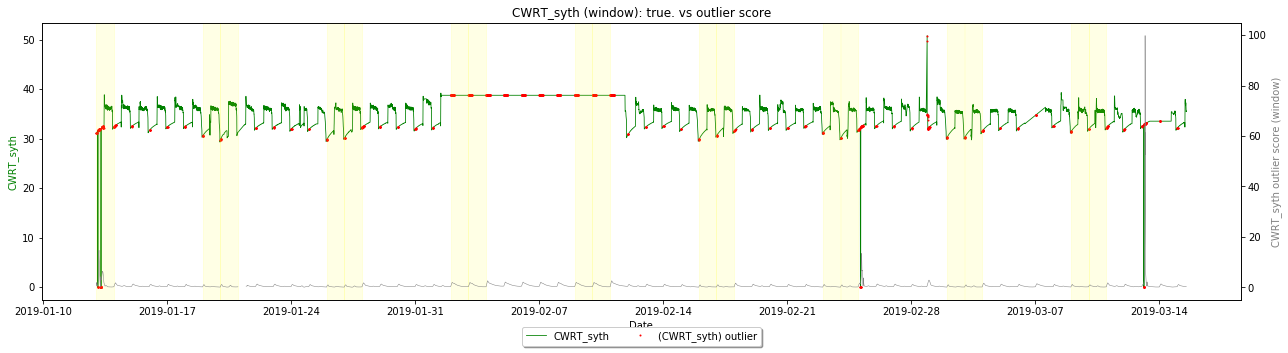

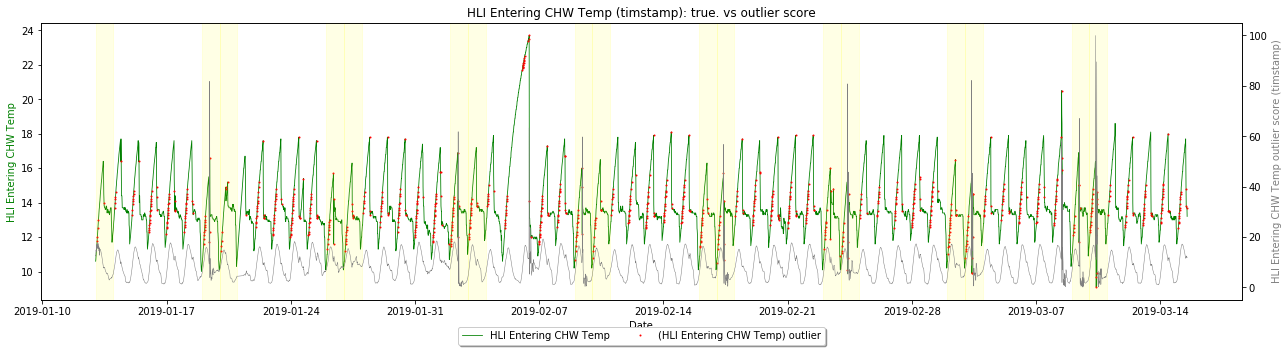

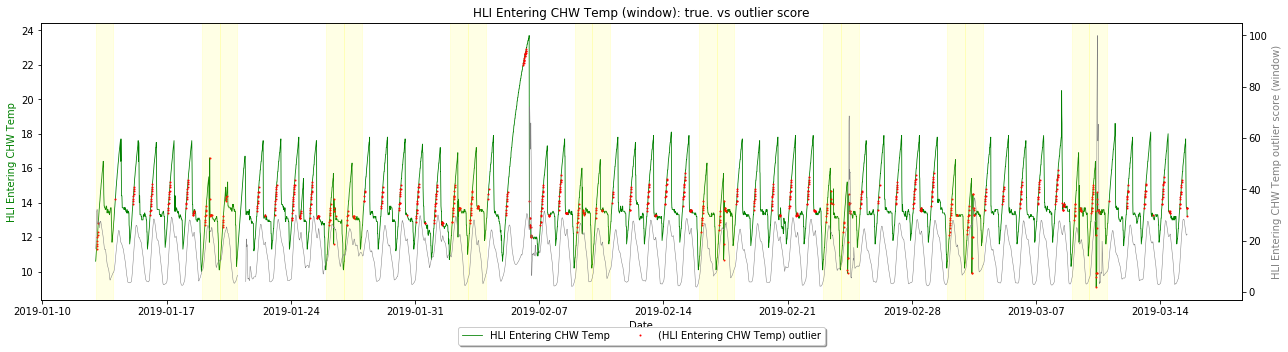

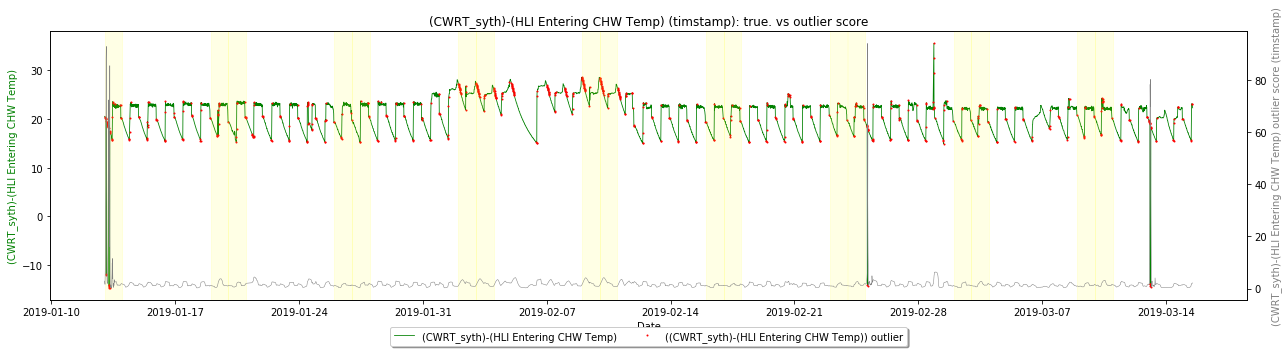

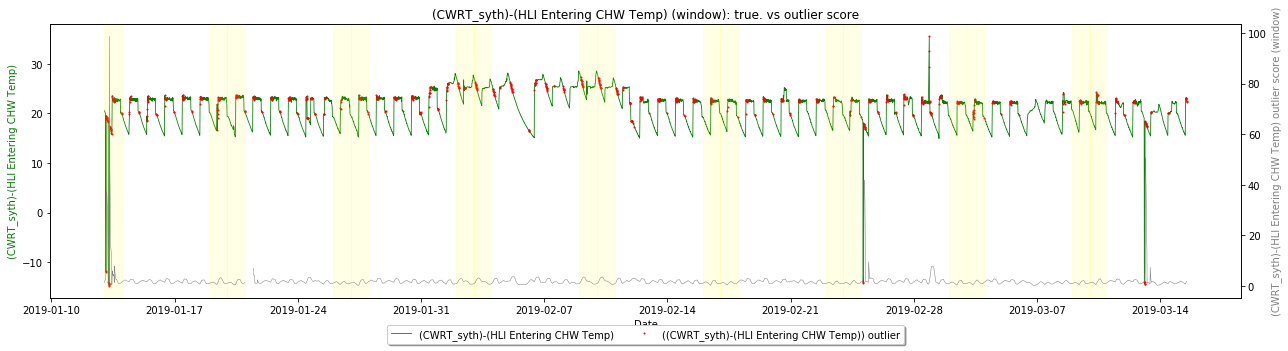

In [37]:
# ------------ outlier score plot ------------------

for col in maincols+derivecol:
    for tp in ['timstamp', 'window']:
        
        scorecol = '('+col+')_outlier score_('+tp+')_modified'
        df = data_combine[['('+col+')_outlier score_('+tp+')', col]].copy().dropna(subset=[col])
        df[scorecol] = getnextscore(df, '('+col+')_outlier score_('+tp+')', int(2*60/5), pctoutlier = 0.002)
        pct_outlier = 0.05  # pctoutlier_dict[col]
        thrshold = np.nanpercentile(df[scorecol].values, (1-pct_outlier)*100)
        
        subdf_outlier = df[df['('+col+')_outlier score_('+tp+')']>thrshold].copy().dropna(subset=[col])

        fig, ax1 = plt.subplots(figsize=(18, 5))
        ax2 = ax1.twinx()
        ax2.spines['right'].set_position(('axes', 1))

        L1 = ax1.plot_date(df.index, df[col],
                           c='green',  markersize=0.5,  marker='', linewidth=0.8, linestyle='-', 
                           label=col)
        L2 = ax1.plot_date(subdf_outlier.index, subdf_outlier[col], 
                           c='red',  markersize=2,  marker='.', linewidth=0.2, linestyle='', 
                           label='('+col+') outlier')
        ax1.set_ylabel(col, color='green')
        ax1.set_xlabel('Date')

        tmp = data_combine.index.to_frame()
        tmp['wkday'] = data_combine.index.weekday+1
        tmp['date'] = tmp.index.date
        allwknddate = np.unique(tmp.loc[tmp['wkday'].isin([6,7]), 'date'])
        i = 0
        for dt in allwknddate:
            alltm_dt = tmp[str(dt)].index
            if i == len(allwknddate)-1:
                plt.axvspan(min(alltm_dt), max(alltm_dt), alpha=0.1, color='yellow', label='weekends')
            else:
                plt.axvspan(min(alltm_dt), max(alltm_dt), alpha=0.1, color='yellow')
            i += 1

        L3 = ax2.plot_date(df.index, df[scorecol], c='grey',  markersize=1,  marker='', 
                           linewidth=0.5, linestyle='-', label='('+col+') outlier score ('+tp+')_modified')
        ax2.set_ylabel(col+' outlier score ('+tp+')', color='grey')

        plt.title(col+' ('+tp+'): true. vs outlier score')
        lns = L1+L2+L3
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, shadow=True, ncol=5)
        plt.tight_layout()
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, shadow=True, ncol=5)
        plt.show()
